In [5]:
pip install scipy

     --------------------------------------- 44.8/44.8 MB 19.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Analysis Steps:
1.Summary Statistics: Calculate basic descriptive statistics for SalePrice, GarageCars, and LotArea.
2.Frequency Tables: Create frequency tables for LotConfig and LotShape.
3.Bivariate Analysis: Examine relationships between SalePrice and other variables:
    -Scatter plots for SalePrice vs GarageCars and SalePrice vs LotArea.
    -Box plots for SalePrice by LotConfig and LotShape.
4.Confidence Intervals: Calculate confidence intervals for the mean SalePrice.

In [7]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the data from the Excel file
file_path = 'C:/Users/nazar/OneDrive/Documentos/data s sosten/analisis de datos/House-Prices.xlsx'
data = pd.read_excel(file_path)

# Extract the relevant columns
data_subset = data[['SalePrice', 'GarageCars', 'LotArea', 'LotConfig', 'LotShape']]
# Calculate summary statistics for SalePrice, GarageCars, and LotArea
summary_stats = data_subset[['SalePrice', 'GarageCars', 'LotArea']].describe()

# Create frequency tables for LotConfig and LotShape
lot_config_freq = data_subset['LotConfig'].value_counts()
lot_shape_freq = data_subset['LotShape'].value_counts()

# Display summary statistics
print("Summary Statistics:")
print(summary_stats)

# Display frequency tables
print("\nFrequency Table for LotConfig:")
print(lot_config_freq)
print("\nFrequency Table for LotShape:")
print(lot_shape_freq)


Summary Statistics:
           SalePrice   GarageCars        LotArea
count    1460.000000  1460.000000    1460.000000
mean   180921.195890     1.767123   10516.828082
std     79442.502883     0.747315    9981.264932
min     34900.000000     0.000000    1300.000000
25%    129975.000000     1.000000    7553.500000
50%    163000.000000     2.000000    9478.500000
75%    214000.000000     2.000000   11601.500000
max    755000.000000     4.000000  215245.000000

Frequency Table for LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

Frequency Table for LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Next, let's proceed with the bivariate analysis by creating scatter plots and box plots to examine the relationships between SalePrice and the other variables.

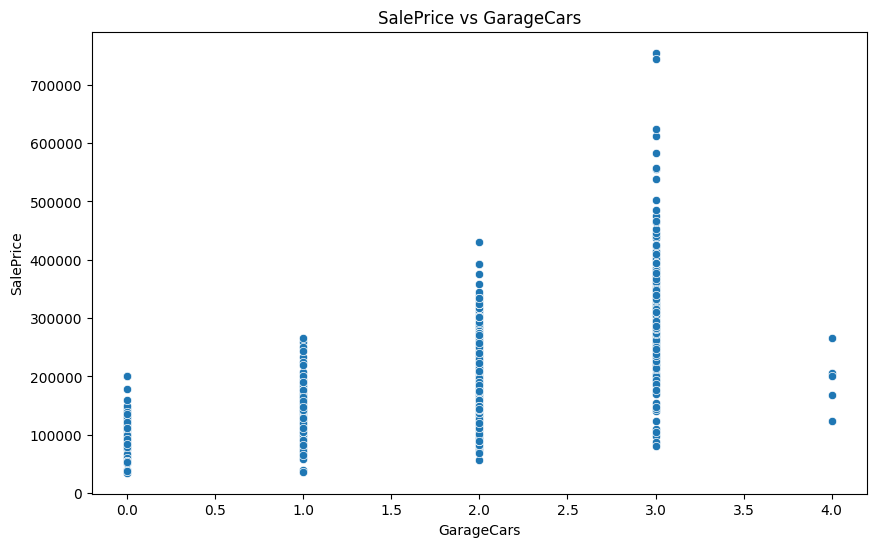

In [8]:
# Scatter plot for SalePrice vs GarageCars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GarageCars', y='SalePrice', data=data_subset)
plt.title('SalePrice vs GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

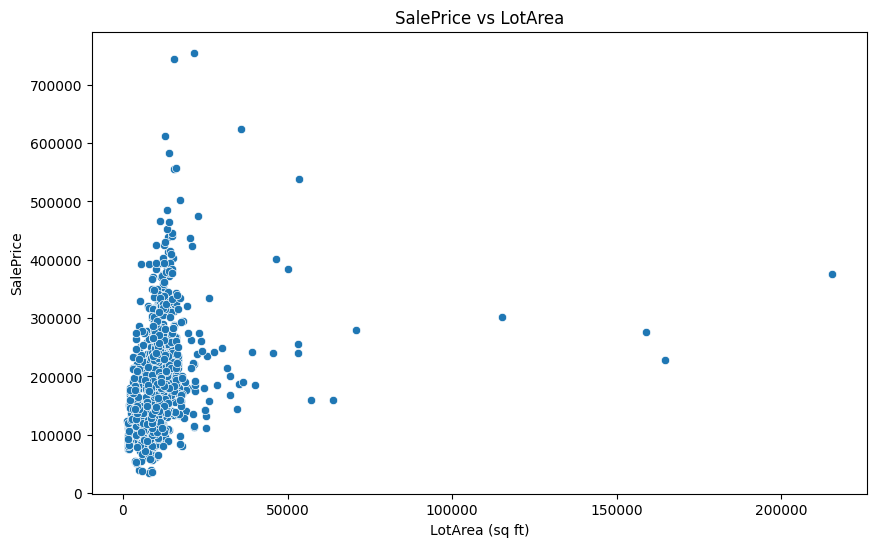

In [9]:
# Scatter plot for SalePrice vs LotArea
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=data_subset)
plt.title('SalePrice vs LotArea')
plt.xlabel('LotArea (sq ft)')
plt.ylabel('SalePrice')
plt.show()


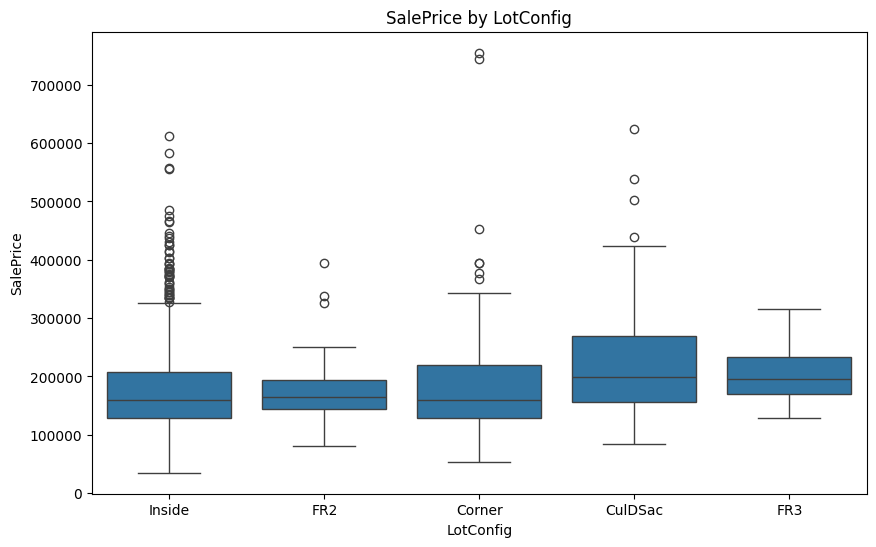

In [10]:
# Box plot for SalePrice by LotConfig
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotConfig', y='SalePrice', data=data_subset)
plt.title('SalePrice by LotConfig')
plt.xlabel('LotConfig')
plt.ylabel('SalePrice')
plt.show()

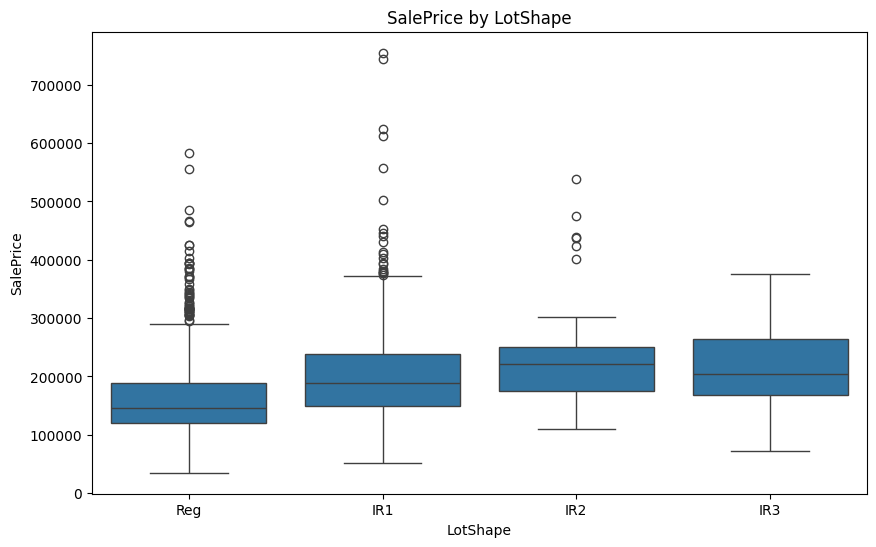

In [11]:
# Box plot for SalePrice by LotShape
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=data_subset)
plt.title('SalePrice by LotShape')
plt.xlabel('LotShape')
plt.ylabel('SalePrice')
plt.show()


Bivariate Analysis Results:
Scatter Plot of SalePrice vs GarageCars:

There is a positive relationship between the number of garage cars and the sale price, indicating that houses with larger garages tend to have higher prices.
Scatter Plot of SalePrice vs LotArea:

There is a positive trend showing that larger lot areas generally correspond to higher sale prices, though the data shows significant variability.
Box Plot of SalePrice by LotConfig:

The median sale price varies across different lot configurations. Houses in cul-de-sac lots (CulDSac) tend to have higher median prices compared to other lot configurations.
Box Plot of SalePrice by LotShape:

The median sale price is highest for regular-shaped lots (Reg), followed by irregular shapes (IR1, IR2, IR3).

Confidence Intervals for SalePrice
To calculate the confidence interval for the mean sale price, we will use a 95% confidence level.

In [13]:
# Calculate the confidence interval for the mean SalePrice
mean_sale_price = data_subset['SalePrice'].mean()
std_sale_price = data_subset['SalePrice'].std()
n = data_subset['SalePrice'].count()
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the margin of error
margin_of_error = z_score * (std_sale_price / (n**0.5))

# Calculate the confidence interval
confidence_interval = (mean_sale_price - margin_of_error, mean_sale_price + margin_of_error)

print(f"\nMean SalePrice: {mean_sale_price}")
print(f"95% Confidence Interval for the Mean SalePrice: {confidence_interval}")


Mean SalePrice: 180921.19589041095
95% Confidence Interval for the Mean SalePrice: (176846.22433536968, 184996.1674454522)


Confidence Interval for SalePrice
The mean sale price of the houses is $180,921.20. With a 95% confidence level, the confidence interval for the mean sale price ranges from $176,846.22 to $184,996.17.

This interval indicates that we can be 95% confident that the true mean sale price of the houses falls within this range.

Detailed Conclusions
Summary Statistics
SalePrice:

The average sale price of houses is $180,921.20, with a significant variation as indicated by a standard deviation of $79,442.50.
The range of sale prices is wide, from a minimum of $34,900 to a maximum of $755,000. The interquartile range (IQR) shows that 50% of the sale prices lie between $129,975 and $214,000, indicating a concentration around these values.
GarageCars:

The average garage size is approximately 1.77 cars.
Most houses have garages that can accommodate 1 or 2 cars, as indicated by the median and 75th percentile both being 2 cars. A few houses have garages for 3 or more cars, as shown by the maximum value of 4 cars.
LotArea:

The average lot area is 10,516.83 square feet, with a substantial standard deviation of 9,981.26 square feet, indicating large variability in lot sizes.
The lot sizes range from 1,300 to 215,245 square feet, with the interquartile range indicating that 50% of the lot sizes lie between 7,553.5 and 11,601.5 square feet.
Frequency Tables
LotConfig:

The majority of houses are located on inside lots (1,052), followed by corner lots (263). There are fewer houses on cul-de-sac lots (94), frontage on two sides (FR2, 47), and only a very few on frontage on three sides (FR3, 4).
LotShape:

Most lots have a regular shape (925), followed by slightly irregular (IR1, 484), moderately irregular (IR2, 41), and highly irregular (IR3, 10).
Bivariate Analysis
Scatter Plot of SalePrice vs GarageCars:

There is a clear positive relationship between the number of garage cars and the sale price. Houses with larger garages tend to have higher sale prices, indicating that garage capacity is a significant factor in house valuation.
Scatter Plot of SalePrice vs LotArea:

There is a positive correlation between lot area and sale price, suggesting that larger lots tend to have higher sale prices. However, there is considerable variability, indicating that other factors also play significant roles in determining sale prices.
Box Plot of SalePrice by LotConfig:

The median sale price varies across different lot configurations. Houses in cul-de-sac lots (CulDSac) have higher median prices compared to other lot configurations. Inside lots and corner lots have similar median prices, while houses with frontages on multiple sides (FR2 and FR3) show more variability in prices.
Box Plot of SalePrice by LotShape:

Regular-shaped lots (Reg) have the highest median sale prices, followed by slightly irregular lots (IR1). Moderately and highly irregular lots (IR2 and IR3) have lower median prices and higher variability, indicating that lot shape impacts the valuation of properties.
Confidence Intervals for SalePrice
The mean sale price of the houses is $180,921.20.
With a 95% confidence level, the confidence interval for the mean sale price ranges from $176,846.22 to $184,996.17.
This interval suggests that we can be 95% confident that the true mean sale price of houses in this dataset lies within this range. The relatively narrow width of the confidence interval (approximately $8,150) indicates a fairly precise estimate of the mean sale price.
Final Conclusions
The analysis reveals several key insights:

Garage Size and Lot Area: Both variables are positively correlated with house prices, with larger garages and lot areas generally leading to higher sale prices. However, lot area shows significant variability, indicating that other factors also influence house prices.
Lot Configuration and Shape: Both lot configuration and shape impact house prices. Houses on cul-de-sac lots and regular-shaped lots have higher median prices, suggesting these characteristics are valued by buyers.
Confidence in Mean Sale Price: The 95% confidence interval for the mean sale price is relatively narrow, providing a precise estimate of the average house price in this dataset.
These findings can help inform real estate valuations and investment decisions by highlighting the importance of garage size, lot area, lot configuration, and shape in determining house prices.